In [66]:
import urllib
import math
import csv
import operator 
import datetime
import re
from sklearn.ensemble import RandomForestRegressor
from sklearn import cross_validation
import numpy as np
import scipy as sp
import copy
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import plotly.plotly as py
from matplotlib import pylab

In [3]:
#Yelp Elite Count
def parseData(fname):
  for l in urllib.urlopen(fname):
    yield eval(l)

print "Reading data..."
users = list(parseData("/Users/carolinekim/Desktop/AWS/Yelp/yelp_academic_dataset_user.json"))
print "done"

Reading data...
done


In [94]:
# review and tip
print "Reading review data..."
reviews = list(parseData("/Users/carolinekim/Desktop/AWS/Yelp/yelp_academic_dataset_review.json"))
print "done"

Reading review data...
done


In [96]:
# review and tip
print "Reading tip data..."
reviews = list(parseData("/Users/carolinekim/Desktop/AWS/Yelp/yelp_academic_dataset_tip.json"))
print "done"

Reading tip data...
done


In [4]:
print len(users)

366715


In [99]:
# consecutive elite count
# n-utive elite count
ncutiveDic = []
for x in range(0, 20):
    ncutiveDic.append(0)

for x in range(0, len(users)):
    row = users[x]
    years = users[x]['elite']
    if len(years) > 0:
        for y in range (0, len(years) - 1):
            z = y
            ncutive = 0
            while (True):
                if years[z] + 1 == years[z+1]:
                    ncutive += 1
                else:
                    y = z
                    break
                z += 1
                if z == len(years) - 1:
                    break
            ncutiveDic[ncutive] += 1

In [100]:
print ncutiveDic

[834, 21881, 14506, 9311, 5217, 2906, 1377, 604, 247, 71, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0]


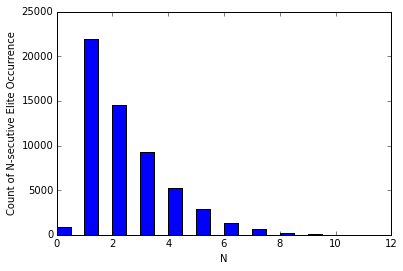

In [111]:

x = range(0, 11)
ncutiveDic = ncutiveDic[0:11]
ax = plt.subplot(111)
ax.bar(x, ncutiveDic, width=0.5)
#ax.bar(x+0.5, z,width=10,color='b',align='center')
pylab.xlabel("N")
pylab.ylabel("Count of N-secutive Elite Occurrence")

In [19]:
# Count users who have never been elite (Elite Retetion rate)
count = 0
for x in range(0, len(users)):
    count += (users[x]['elite'] == [])
print count

341414


In [28]:
# % of users who have been yelp elite at least once
print (366715.0-341414) / 366715

0.0689936326575


In [29]:
# count yelp eliters by year
yelpEliteCount = {}

for x in range(0, len(users)):
    row= users[x]
    years = users[x]['elite']
    if len(years) > 0:
        for year in years:
            if year not in yelpEliteCount:
                yelpEliteCount[year] = 0
            yelpEliteCount[year] += 1

print yelpEliteCount

{2005: 117, 2006: 707, 2007: 1924, 2008: 2942, 2009: 5202, 2010: 8206, 2011: 10174, 2012: 13403, 2013: 13696, 2014: 14512, 2015: 11386}


In [37]:
# of total yelp users in the database
yelpUserCountByJoinYear = {}
yelpUserCountByJoinYearMonth = {}

for x in range(0, len(users)):
    row= users[x]
    date = users[x]['yelping_since']
    year = date[0:4]
    if year not in yelpUserCountByJoinYear:
        yelpUserCountByJoinYear[year] = 0
    yelpUserCountByJoinYear[year] += 1
    if date not in yelpUserCountByJoinYearMonth:
        yelpUserCountByJoinYearMonth[date] = 0
    yelpUserCountByJoinYearMonth[date] += 1
    
print yelpUserCountByJoinYear
print yelpUserCountByJoinYearMonth

{'2006': 3974, '2007': 10676, '2004': 51, '2005': 691, '2015': 1148, '2014': 50505, '2008': 19390, '2009': 32968, '2011': 69210, '2010': 50722, '2013': 63483, '2012': 63897}
{'2014-09': 3250, '2014-08': 4485, '2014-05': 5251, '2014-04': 5019, '2014-07': 5446, '2014-06': 5127, '2014-01': 5174, '2014-03': 5363, '2014-02': 4531, '2010-01': 3662, '2010-03': 3793, '2010-02': 3431, '2013-08': 6120, '2013-09': 5086, '2010-07': 5729, '2010-06': 4523, '2010-09': 4552, '2013-05': 5703, '2013-06': 5756, '2013-07': 6046, '2013-01': 5480, '2013-02': 4963, '2013-03': 5495, '2012-07': 5866, '2004-12': 12, '2004-11': 6, '2004-10': 33, '2012-04': 5014, '2015-01': 1148, '2014-12': 1733, '2014-10': 2950, '2014-11': 2176, '2011-11': 5284, '2011-10': 5466, '2011-12': 4953, '2012-09': 5472, '2012-08': 5524, '2012-03': 5485, '2012-02': 4915, '2012-01': 5467, '2010-12': 4563, '2012-06': 5493, '2010-10': 4064, '2010-11': 4060, '2012-05': 5066, '2010-05': 3470, '2010-04': 3475, '2011-08': 6144, '2011-09': 5268,

In [78]:
# Total Yelp Users since 2005-01
months = []
monthsDateTime = []
userCount = []

sinceYear = 2005
sinceMonth = 1

offset = 0
prevUserCount = 0
for year in range(2005, 2015):
    for month in range(1,13):
        key = str(year)+'-'+str(month).zfill(2)
        userCountIncrease = 0
        if key in yelpUserCountByJoinYearMonth:
            userCountIncrease = yelpUserCountByJoinYearMonth[key]
        userCount.append(userCountIncrease + prevUserCount)
        prevUserCount = userCountIncrease + prevUserCount
        months.append(offset)
        monthsDateTime.append(datetime.datetime(year, month, 1, 10, 0))
        offset += 1
        

In [80]:
# Total Yelp Users since 2005-01
yearsDateTime = []
userCountYears = []
eliteUserCountYears = []

prevUserCount = 0
for year in range(2005, 2015):
    key = str(year)
    userCountIncrease = 0
    if key in yelpUserCountByJoinYear:
        userCountIncrease = yelpUserCountByJoinYear[key]
    userCountYears.append(userCountIncrease + prevUserCount)
    prevUserCount = userCountIncrease + prevUserCount
    yearsDateTime.append(datetime.datetime(year, 6, 1, 10, 0))
    eliteUserCountYears.append(yelpEliteCount[year])
        

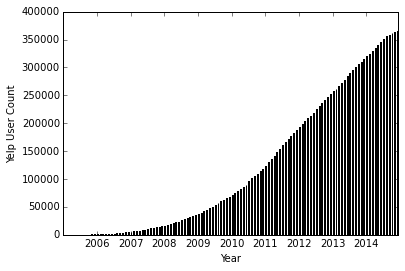

In [70]:
x = monthsDateTime
y = userCount
ax = plt.subplot(111)
ax.bar(x, y, width=10)
pylab.xlabel("Year")
pylab.ylabel("Yelp User Count")

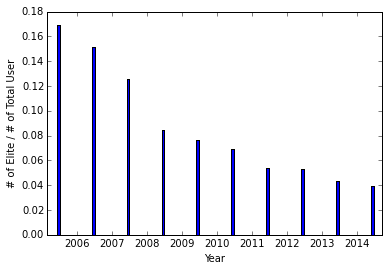

In [93]:
x = yearsDateTime
y = userCountYears
z = eliteUserCountYears

ratioOverYear = []
for i in range (0, len(x)):
    ratioOverYear.append(z[i]*1.0/y[i]) 

x = date2num(x)
ax = plt.subplot(111)
ax.bar(x, ratioOverYear, width=30)
#ax.bar(x+0.5, z,width=10,color='b',align='center')
ax.xaxis_date()
pylab.xlabel("Year")
pylab.ylabel("# of Elite / # of Total User")

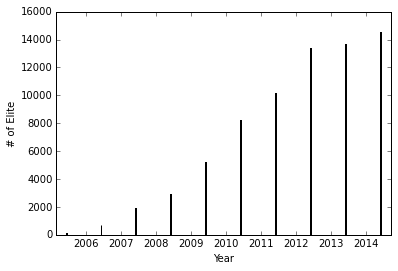

In [97]:
x = yearsDateTime
z = eliteUserCountYears

x = date2num(x)
ax = plt.subplot(111)
ax.bar(x, z, width=10)
ax.xaxis_date()
pylab.xlabel("Year")
pylab.ylabel("# of Elite")

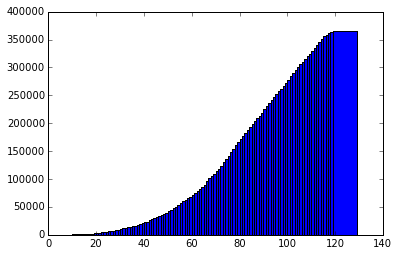

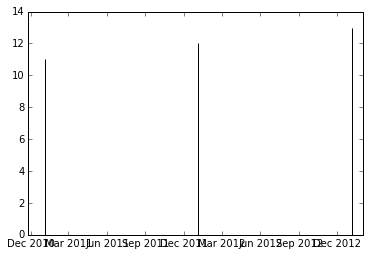

In [60]:
date = plt.figure()

x = [datetime.datetime(2010, 12, 1, 10, 0),
    datetime.datetime(2011, 1, 4, 9, 0),
    datetime.datetime(2011, 5, 5, 9, 0)]
y = [4, 9, 2]

ax = plt.subplot(111)
ax.bar(months, userCount, width=10)
pylab.xlabel("FOO")
pylab.ylabel("FOO")
pylab.title("Testing")
#ax.xaxis_date()


multiple_bars = plt.figure()

x = [datetime.datetime(2011, 1, 4, 0, 0),
     datetime.datetime(2012, 1, 5, 0, 0),
     datetime.datetime(2013, 1, 6, 0, 0)]
x = date2num(x)

y = [4, 9, 2]
z= [1,2,3]
k= [11,12,13]

ax = plt.subplot(111)
ax.bar(x-0.2, y,width=0.2,color='b',align='center')
ax.bar(x, z,width=0.2,color='g',align='center')
ax.bar(x+0.2, k,width=0.2,color='r',align='center')
ax.xaxis_date()

plt.show()
